In [1]:
import os
import numpy as np
import clima_anom as ca

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Example to extract Ocean and Continent

In [2]:
data_dir = '..'+os.sep+'data'+os.sep+'3B42_199901_201212_climatology.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
pre = data['pre']

lat : (110,)
lon : (110,)
time : (12,)
pre : (12, 110, 110)


In [3]:
lon2d, lat2d = np.meshgrid(lon, lat)

In [4]:
pre_continent = ca.remove_continent_ocean(pre,lat,lon,'continent')
pre_ocen = ca.remove_continent_ocean(pre,lat,lon,'ocean')

/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


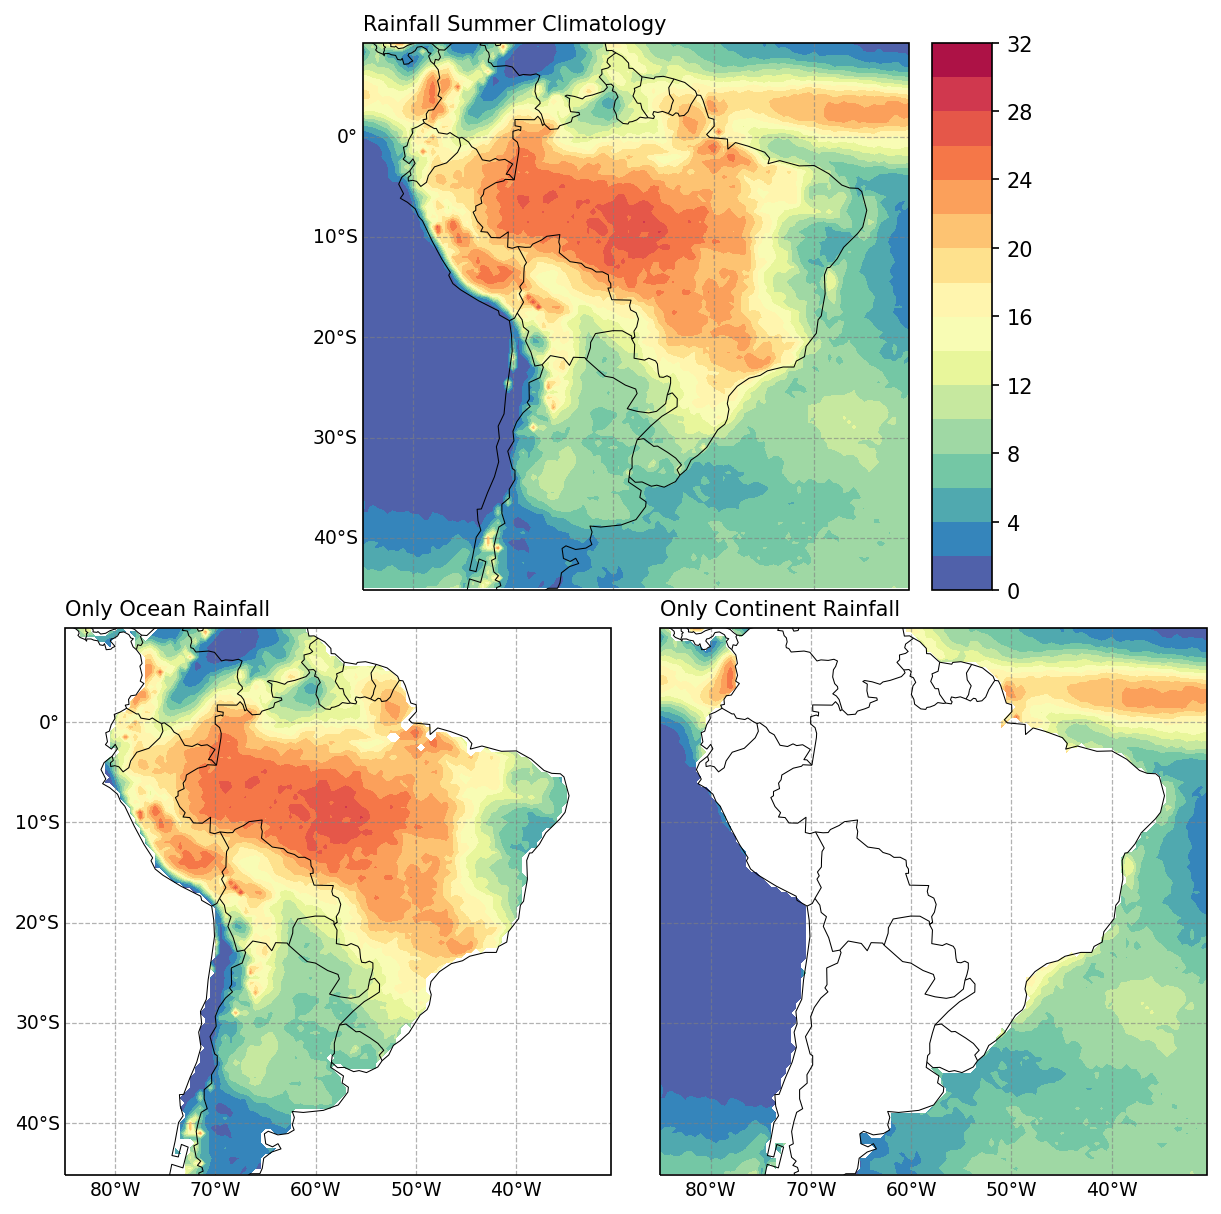

In [5]:
levels = np.arange(0,34,2)
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10),dpi=150)
gs = gridspec.GridSpec(2,2)

ax1 = plt.subplot(gs[0, 0:], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-30.5,-42,8.5])
a1 = ax1.contourf(lon2d, lat2d, pre[0,:,:],levels=levels,cmap=cmap)
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Rainfall Summer Climatology',fontsize=10,loc='left')

ax2 = plt.subplot(gs[1, 0], projection = proj)
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-85,-30.5,-42,8.5])
a2 = ax2.contourf(lon2d, lat2d, pre_ocen[0,:,:],levels=levels,cmap=cmap)
gl = ax2.gridlines(crs = proj,draw_labels=False,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax2.set_title('Only Ocean Rainfall',fontsize=10,loc='left')

ax3 = plt.subplot(gs[1, 1], projection = proj) 
ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax3.set_extent([-85,-30.5,-42,8.5])
a3 = ax3.contourf(lon2d, lat2d, pre_continent[0,:,:],levels=levels,cmap=cmap)
gl = ax3.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax3.set_title('Only Continent Rainfall',fontsize=10,loc='left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.07, wspace=0.05)

cbaxes = fig.add_axes([0.71, 0.515, 0.04, 0.365]) 
fig.colorbar(a1, cax = cbaxes,orientation="vertical")

plt.savefig('..'+os.sep+'figures'+os.sep+'Wind_remove_continent_ocean.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)